# Notebook for CRN1

This notebook was used to generate all the data about the creation chemical reaction.

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.stats import poisson
import neuralnetwork
import convert_csv
import generate_data
import simulation
import grads

In [2]:
N_COMPS = 5
NUM_PARAMS = 1
model = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS)

Neural Network created.


In [3]:
FILE_NAME = 'CRN1_creation'
CRN_NAME = 'birth_only'

# loading data
X_train = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train.csv')
y_train = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train.csv')
X_valid = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid.csv')
y_valid = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid.csv')
X_test = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_test.csv')
y_test = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_test.csv')

train_data = [X_train, y_train]
valid_data = [X_valid, y_valid]

In [4]:
neuralnetwork.train_NN(model, train_data, valid_data, loss=neuralnetwork.loss_kldivergence, max_rounds=500, lr=0.01, batchsize=64)

Training ...:  81%|████████  | 484/600 [03:02<00:43,  2.65it/s]

Learning rate: 0.0003124999930150807,
Train loss: 0.0017612740630283952,
 Valid loss: 0.001384418923407793


([6.247010231018066,
  0.01874443329870701,
  0.01602310873568058,
  0.01620190590620041,
  0.017663395032286644,
  0.019382093101739883,
  0.01256965845823288,
  0.007360273506492376,
  0.00883758906275034,
  0.013382157310843468,
  0.01489323191344738,
  0.013422767631709576,
  0.011592836119234562,
  0.010107479989528656,
  0.011043084785342216,
  0.009818474762141705,
  0.009600305929780006,
  0.008824793621897697,
  0.010479183867573738,
  0.009386163204908371,
  0.011675018817186356,
  0.007934104651212692,
  0.008493415080010891,
  0.00968782976269722,
  0.009932673536241055,
  0.01053401455283165,
  0.009228372946381569,
  0.00961324293166399,
  0.009510019794106483,
  0.009442643262445927,
  0.00979464128613472,
  0.009007035754621029,
  0.009137826040387154,
  0.008952355943620205,
  0.007370344363152981,
  0.007082688622176647,
  0.007088774349540472,
  0.007684697862714529,
  0.006459284573793411,
  0.005975436884909868,
  0.006052317097783089,
  0.006688621826469898,
  0.0

In [14]:
def plot_model(to_pred, expectations, model, n_comps=N_COMPS, up_bound=1_100, on_same_fig = False):
    # predictions
    layer_ww, layer_rr, layer_pp = model.forward(to_pred)
    x = torch.arange(up_bound).repeat(1, n_comps,1).permute([2,0,1])
    y_pred = neuralnetwork.mix_nbpdf(layer_rr, layer_pp, layer_ww, x)
    y_pred = y_pred.detach().numpy()
    y_exp = expectations.detach().numpy()
    # plots
    if on_same_fig:
        plt.plot(np.arange(min(len(y_pred), up_bound)), y_pred[:up_bound], color='blue', label='prediction')
        plt.plot(np.arange(min(len(y_exp, up_bound)), y_exp[:up_bound], color='red', label='expectation')
        plt.plot(np.arange(up_bound), poisson.pmf(np.arange(up_bound), to_pred[0]*to_pred[1]), color='green', label='true')
        plt.legend()
        plt.show()
    else:
        fig, axs = plt.subplots(2)
        axs[0].plot(np.arange(len(y_pred)), y_pred)
        axs[0].set_title('Predictions')
        axs[1].plot(np.arange(len(y_exp)), y_exp)
        axs[1].set_title('Expectations', y=-0.4)
        plt.show()

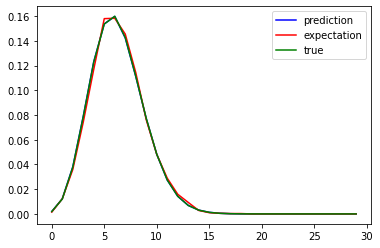

In [18]:
index = 0
plot_model(X_test[index,:], y_test[index, :], model, up_bound = 30, on_same_fig=True)

In [9]:
def check_higher_times(to_pred, model, n_comps=N_COMPS, up_bound=1_100, on_same_fig = False):
    # predictions
    layer_ww, layer_rr, layer_pp = model.forward(to_pred)
    x = torch.arange(up_bound).repeat(1, n_comps,1).permute([2,0,1])
    y_pred = neuralnetwork.mix_nbpdf(layer_rr, layer_pp, layer_ww, x)
    y_pred = y_pred.detach().numpy()
    # plots
    if on_same_fig:
        plt.plot(np.arange(len(y_pred)), y_pred, color='blue', label='prediction')
        plt.plot(np.arange(len(y_pred)), poisson.pmf(np.arange(len(y_pred)), to_pred[0]*to_pred[1]), color='green', label='expectation')
        plt.legend()
        plt.show()
    else:
        fig, axs = plt.subplots(2)
        axs[0].plot(np.arange(len(y_pred)), y_pred)
        axs[0].set_title('Predictions')
        axs[1].plot(np.arange(len(y_pred)), poisson.pmf(np.arange(len(y_pred)), to_pred[0]*to_pred[1]))
        axs[1].set_title('Expectations', y=-0.4)
        plt.show()

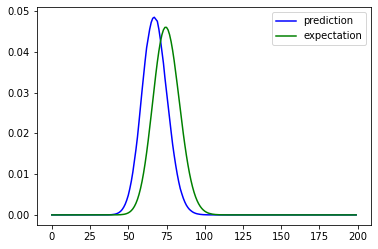

In [35]:
check_higher_times(torch.tensor([50, 1.5]), model, up_bound = 200, on_same_fig=True)